In [1]:
import sys
from ete3 import Tree

In [2]:
# %load_ext rpy2.ipython

1. Как укоренить дерево по известной внешней кладе в IQ-TREE или другой программе?

In [3]:
!iqtree2 -s SUP35_aln_prank.trim.fas -m TIM3+F+G4 -pre SUP35_TIM3_root_outgroup -bb 1000 -alrt 1000 -abayes  -o SUP35_Kla_AB039749,SUP35_Agos_ATCC_10895_NM_211584

Checkpoint (SUP35_TIM3_root_outgroup.ckp.gz) indicates that a previous run successfully finished
Use `-redo` option if you really want to redo the analysis and overwrite all output files.
Use `--redo-tree` option if you want to restore ModelFinder and only redo tree search.
Use `--undo` option if you want to continue previous run when changing/adding options.


2. Как укоренить дерево с помощью midpoint rooting? 
Приведите хотя бы один метод (можно получить бонус за разбор большего количества).

- с помощью ete3

In [4]:
intre = "SUP35_TIM3_ufb.treefile"
tre = Tree(intre, quoted_node_names=True)
midpoint = tre.get_midpoint_outgroup()
tre.set_outgroup(midpoint)
print(tre.write("SUP35_TIM3_ufb_midpoint.treefile"))

((((((SUP35_Scer_74-D694_GCA_001578265.1:0.000480708,SUP35_Scer_beer078_CM005938:1e-06)44:1e-06,SUP35_Sbou_unique28_CM003560:0.000480781)100:0.0469329,SUP35_Spar_A12_Liti:0.0317212)100:0.0354519,SUP35_Smik_IFO1815T_30:0.0731469)96:0.0250628,((SUP35_Sarb_H-6_chrXIII_CM001575:0.0777837,SUP35_Seub_CBS12357_chr_II_IV_DF968535:0.100283)63:0.0171215,SUP35_Skud_IFO1802T_36:0.0978225)39:0.00872313)100:0.158499,(SUP35_Kla_AB039749:0.265069,SUP35_Agos_ATCC_10895_NM_211584:0.32895)100:0.158499);


- с помощью phytools

In [5]:
!Rscript midpoint_root.R

Loading required package: ape
Loading required package: maps

Phylogenetic tree with 10 tips and 9 internal nodes.

Tip labels:
  SUP35_Scer_74-D694_GCA_001578265.1, SUP35_Scer_beer078_CM005938, SUP35_Sbou_unique28_CM003560, SUP35_Spar_A12_Liti, SUP35_Smik_IFO1815T_30, SUP35_Sarb_H-6_chrXIII_CM001575, ...
Node labels:
  Root, 100/1/100, 8.9/0.46/37, 91.8/0.999/62, 96.1/1/95, 100/1/99, ...

Rooted; includes branch lengths.


2. Визуализируйте укоренённые деревья из предыдущих пунктов и приведите их в сравнении с деревом с прошлого занятия.
Чем отличаются изображения?

In [19]:
!Rscript draw_tree.R SUP35_TIM3_ufb.treefile SUP35_TIM3_ufb.png
!Rscript draw_tree.R SUP35_TIM3_ufb_midpoint.treefile SUP35_TIM3_ufb_midpoint.png
!Rscript draw_tree.R SUP35_TIM3_root_outgroup.treefile SUP35_TIM3_root_outgroup.png
!Rscript draw_tree.R SUP35_TIM3_ufb_alrt_abayes_rooted.treefile SUP35_TIM3_ufb_alrt_abayes_rooted.png

Из-за того, что в выравнивании внешнаяя группа была первой, iqtree и до этого считал ее "внешней", хотя дерево и не было укорененным, поэтому деревья отличаются незначительно, больше измерений при укоренении по средней точке.

3. Как укоренить дерево с помощью необратимой (non-reversible) модели (iq-tree2)?

In [21]:
!iqtree2 -s SUP35_aln_prank.trim.fas -m TIM3+F+G4 -pre SUP35_TIM3_root_auto --model-joint 12.12 -B 1000

Checkpoint (SUP35_TIM3_root_auto.ckp.gz) indicates that a previous run successfully finished
Use `-redo` option if you really want to redo the analysis and overwrite all output files.
Use `--redo-tree` option if you want to restore ModelFinder and only redo tree search.
Use `--undo` option if you want to continue previous run when changing/adding options.


4. Визуализируйте дерево с поддержкой корня (rootstrap). Что мы можем сказать об уверенности
алгоритма в выборе корня?


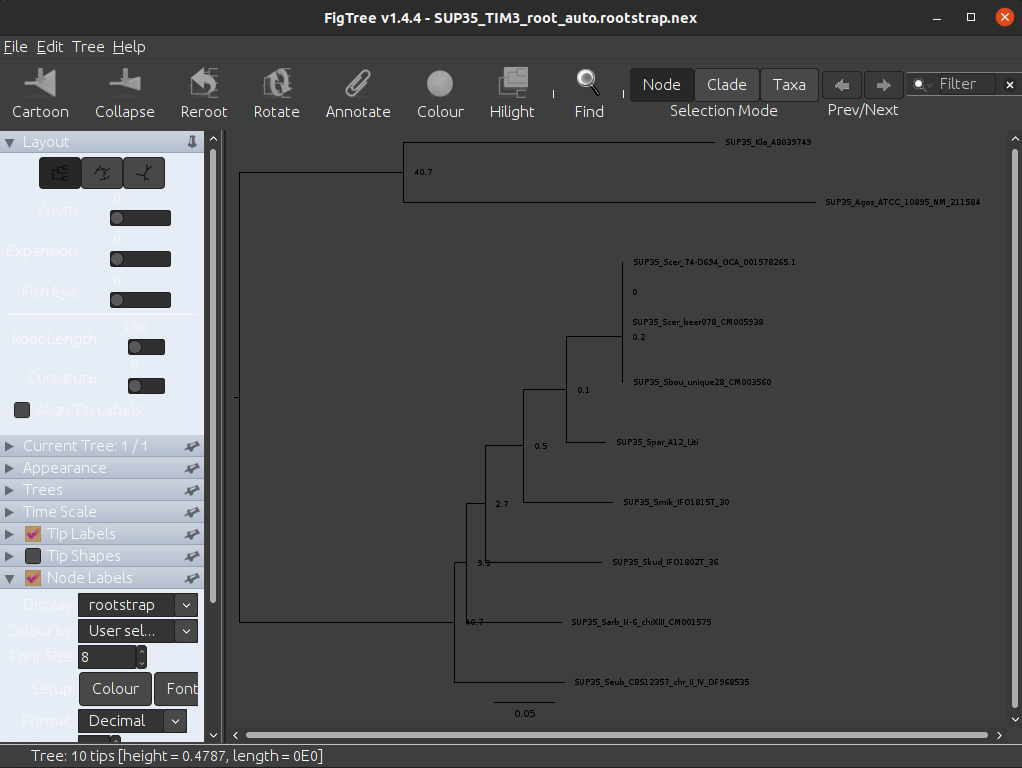

Вероятность корня алгоритм предсказал неуверенно (40 vs 40%)

5. (5 баллов) проведите анализ возраста общего предка двух видов дымчатых леопардов из статьи https://doi.org/10.1016/j.cub.2006.08.066 на данным секвенирования участка гена atp8, опираясь на известные данные о частоте замен в мтДНК (примерно 2% за миллион лет)  в beauti и beast. 
Проверьте качество в Tracer. 
Объедините деревья в treeannotator.
Отрисуйте финальное дерево (можно в FigTree, бонус за ggtree). 
Обязательно покажите оценки возраста общего предка на узлах!

In [26]:
!efetch -db popset -id 126256179 -format fasta >felidae_atp8.fa
!cut -d ' ' -f 1,2,3 felidae_atp8.fa | sed -e 's/ /_/g' > felidae_atp8.renamed.fa
!mafft --auto felidae_atp8.renamed.fa > felidae_atp8.aln
!trimal -in felidae_atp8.aln -out felidae_atp8.trim.fas -nogaps
!iqtree2 -s felidae_atp8.trim.fas -o EF437591.1_Felis_catus -alrt 1000 -abayes

outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
All-to-all alignment.
tbfast-pair (nuc) Version 7.520
alg=L, model=DNA200 (2), 2.00 (6.00), -0.10 (-0.30), noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
   10 / 13
done.

Progressive alignment ... 
STEP    12 /12 
done.
tbfast (nuc) Version 7.520
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
1 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
generating a scoring matrix for nucleotide (dist=200) ... done

   10 / 13
Segment   1/  1    1- 156
STEP 002-011-1  identical.   
Con

ПОлученное выравнивание загружаем в beauti для создания конф. файла для beast

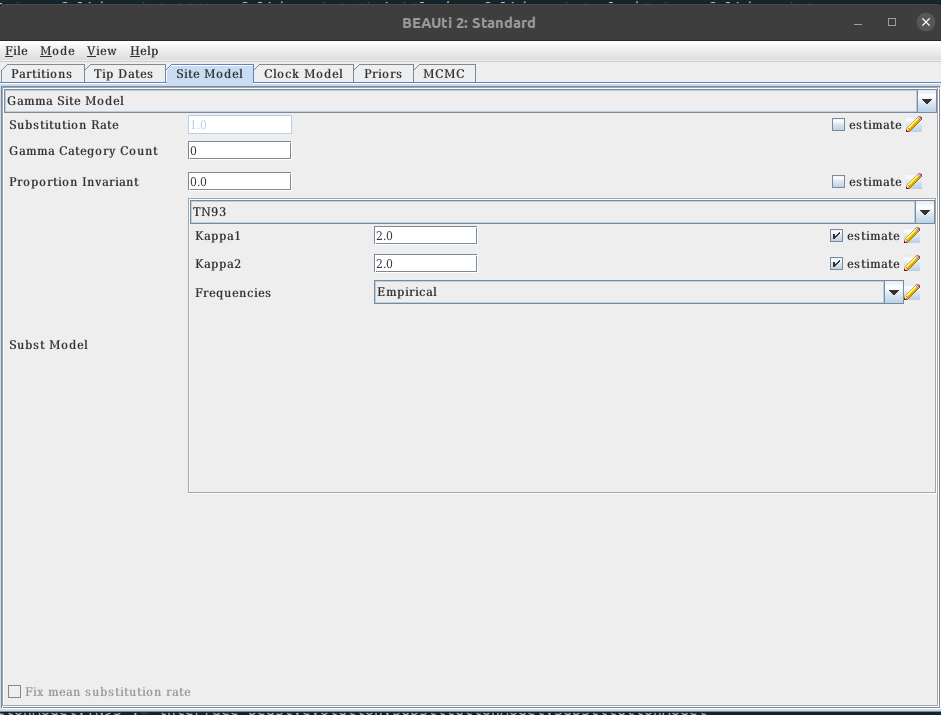

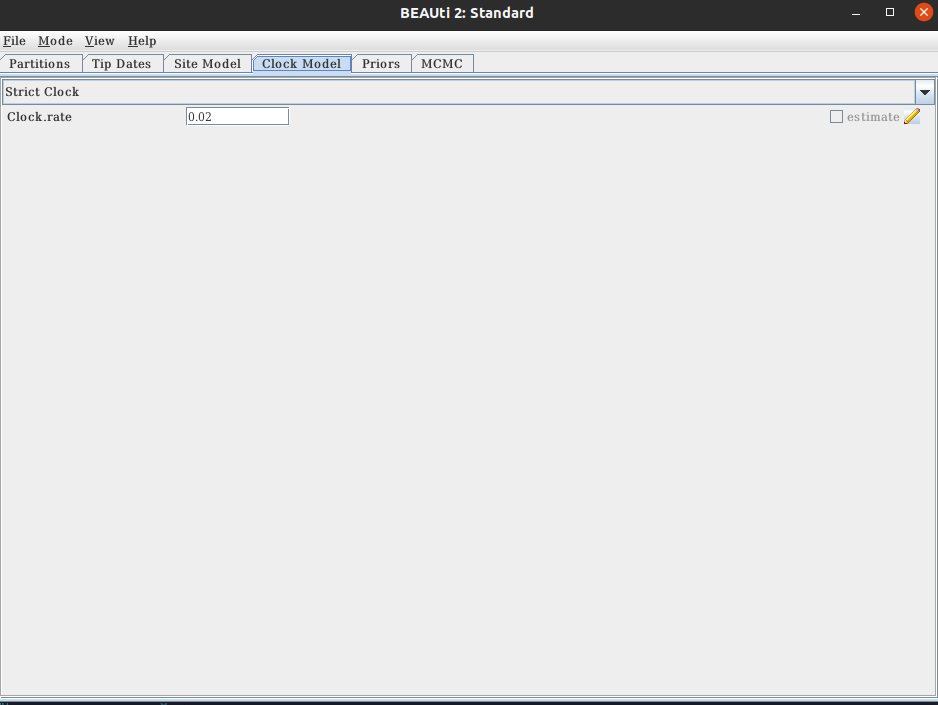

Другие настройки менять не нужно

Далее сохраним кофигурацию в xml-файл и запустим beast

In [ ]:
!beast felidae_atp8_2percent.xml

Полученный log файл откроем в tracer

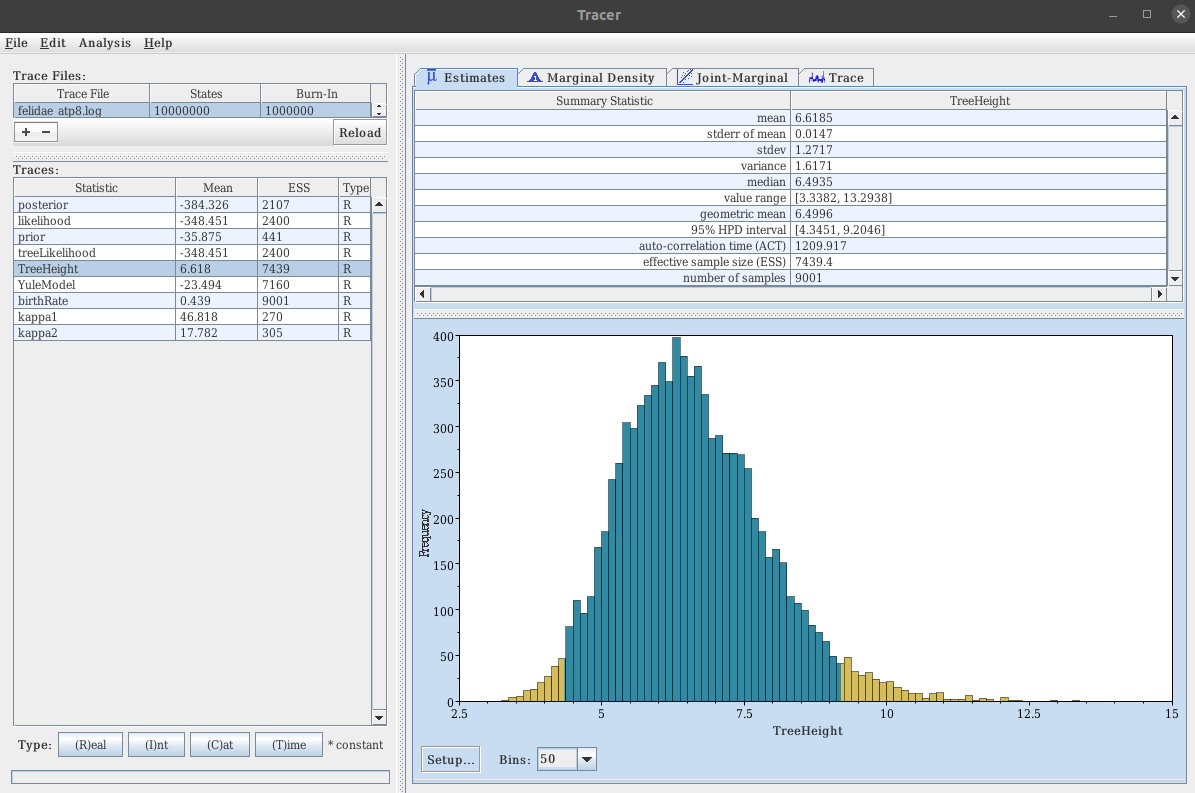

Волосатая гусеница ползет по своим делам, с качеством все ок
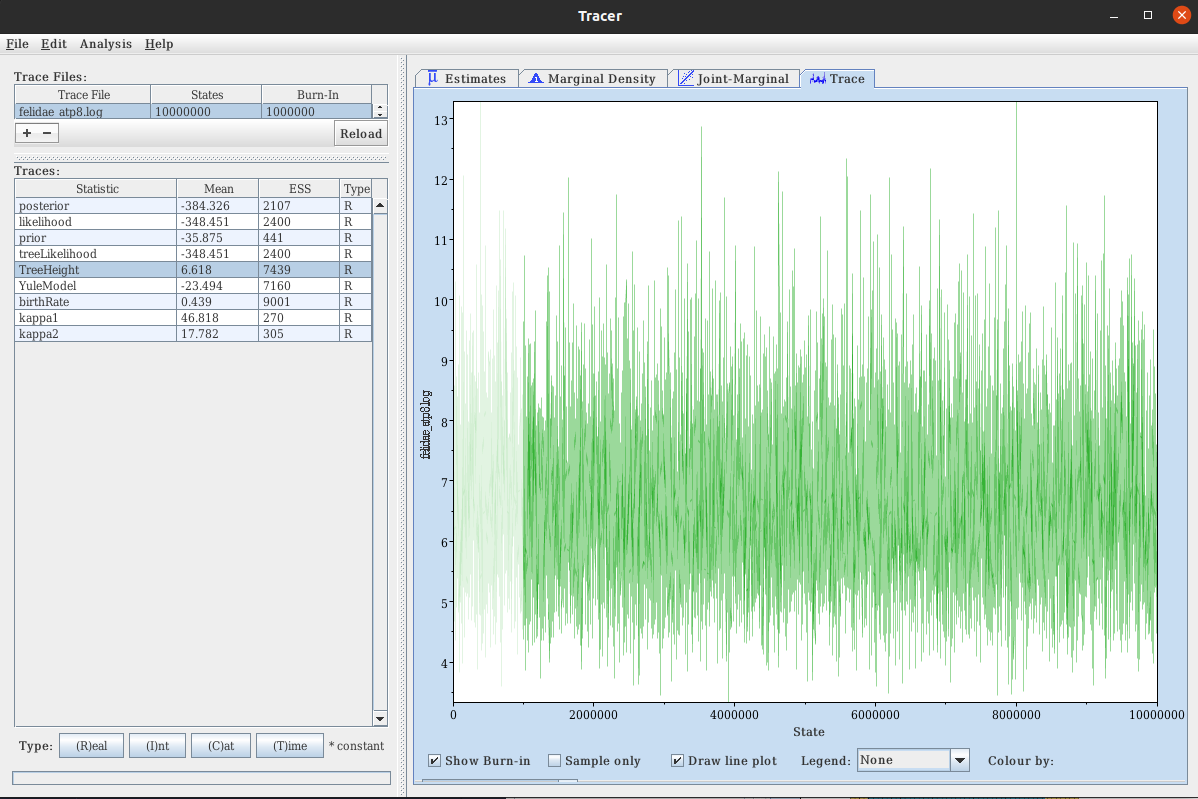

Запустим treeannotator с такими параметрами:
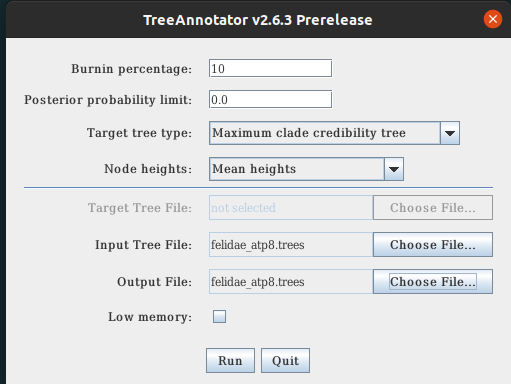

(аутпут в моей версии не редактировался, но там должно быть одно дерево)

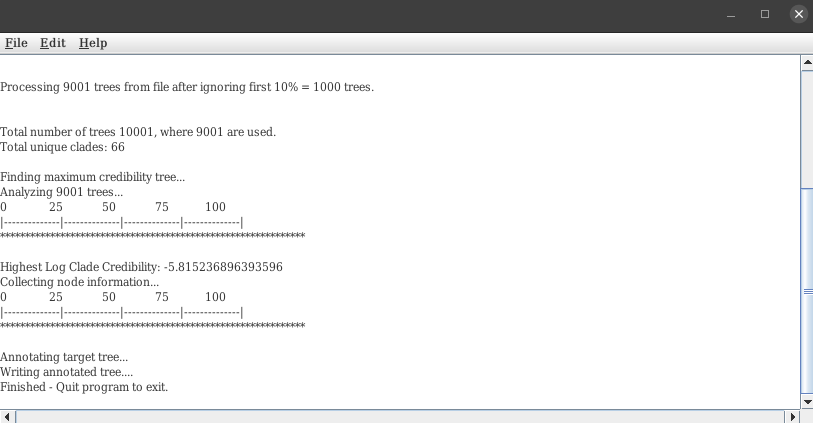

Визуализируем полученное дерево в figtree
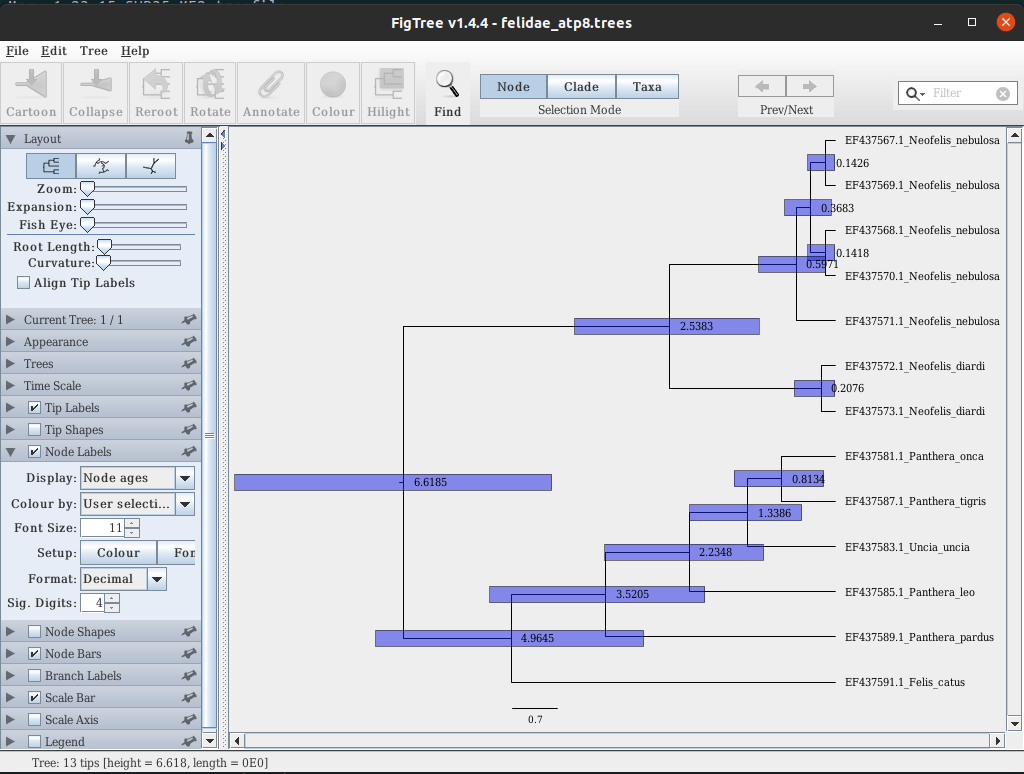

~2.5 млн лет +- трамвайная остановка

Визуализация того же, но в ggtree:
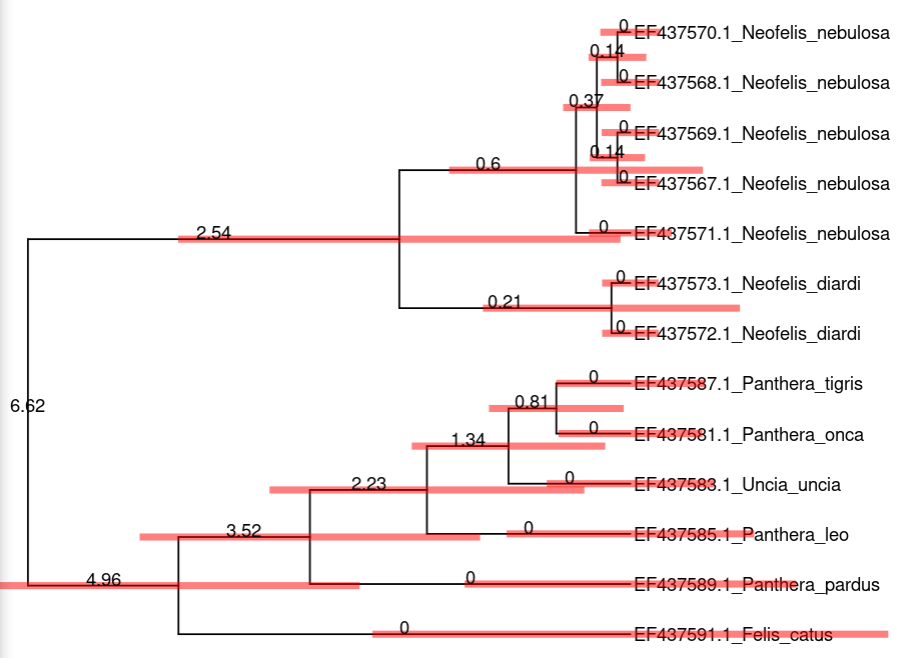

код в R для визуализации:
```R
library(ggplot2)
library(ggtree)
library(ips)
library(treeio)


beast <- read.beast('felidae_atp8.trees') 
ggtree(beast) + 
  geom_tiplab(align=TRUE, linetype='dashed', linesize=.3) + 
  geom_range("length_0.95_HPD", color='red', size=2, alpha=.5) + 
  geom_text2(aes(label=round(as.numeric(height), 2), x=branch), vjust=0)


ggsave('felidae_atp8.png')
```

6. Сравните результаты ваших анализов (возраст последнего общего предка Neofelis) с опубликованными статьями (https://www.science.org/doi/10.1126/sciadv.adh9143, https://www.sciencedirect.com/science/article/pii/S2589004222019198).
Какие выводы можно сделать?

В статье (https://www.science.org/doi/10.1126/sciadv.adh9143) приводят такую оценку:

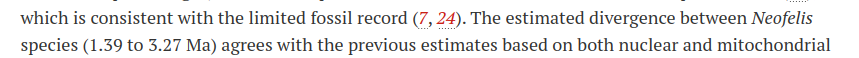

что в целом подтверждает наш анализ

7. (3 бонусных балла) проведите аналогичный п. 5 анализ, но опираясь на то, что возраст последнего общего предка всех кошачьих 11 +- 2 млн лет. Сравните с результатом, полученным в п. 5, а также со статьями. Какие выводы можно сделать?

Откроем наш `felidae_atp8_2percent.xml`

Модель часов оставим той же, но в разделе priors нужно выбрать калиброванную модель, а также добавляем все такосны во вкладке Add prior, при этом обязательно нужно задать название
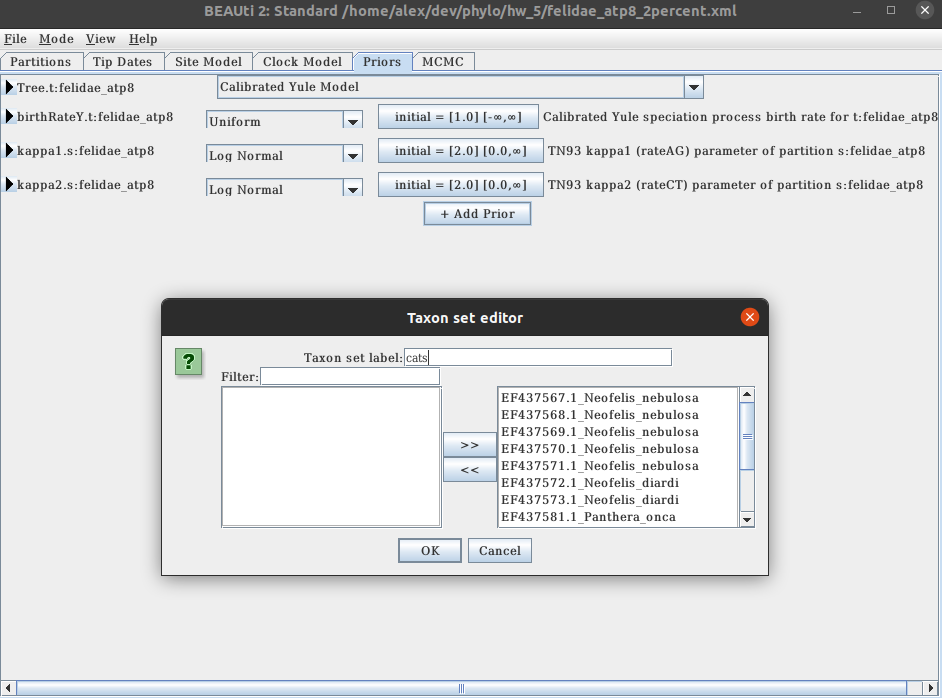

Далее необходимо настроить параметры распределения:
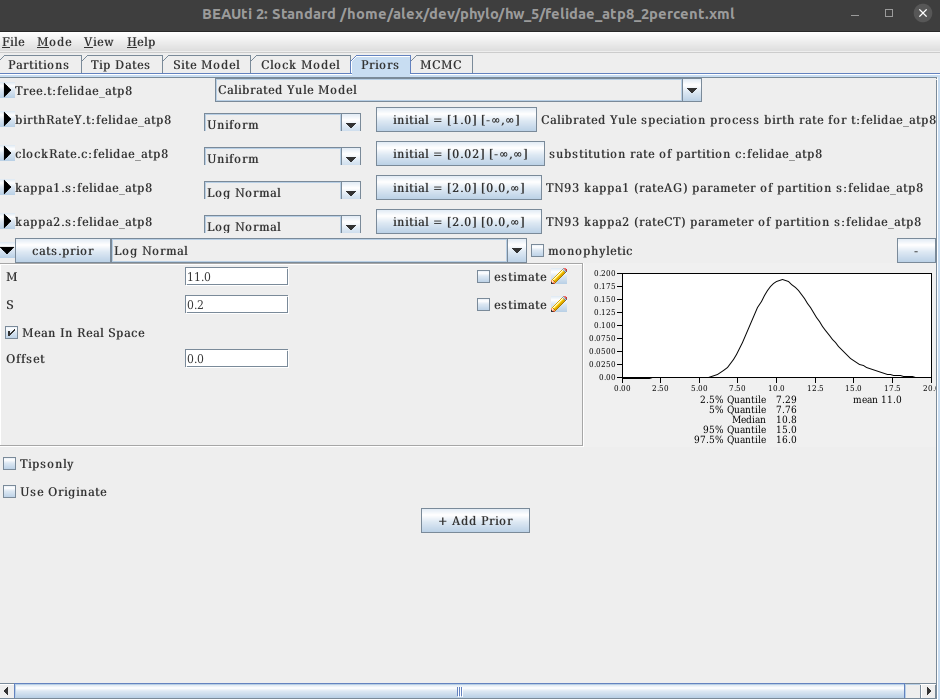

Также нужно не забыть выбрать галочку monophyletic...

In [28]:
!beast feli_try_2.xml  

Далее tracer
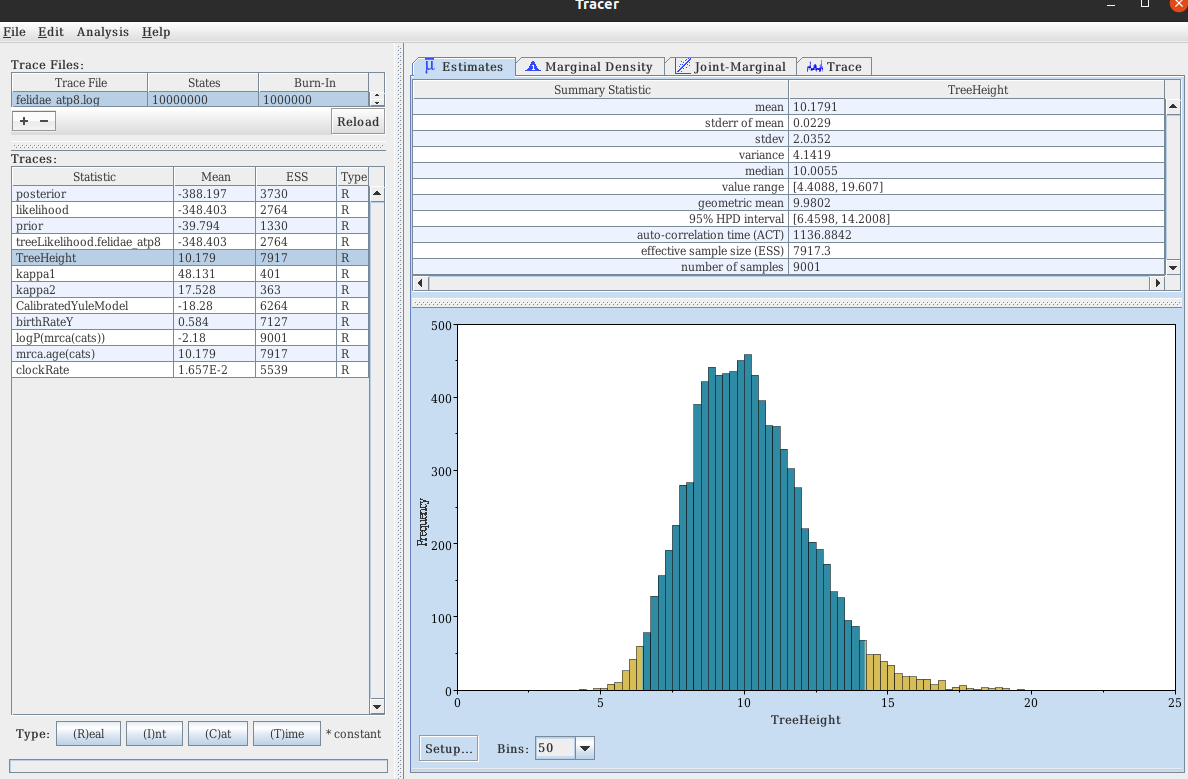

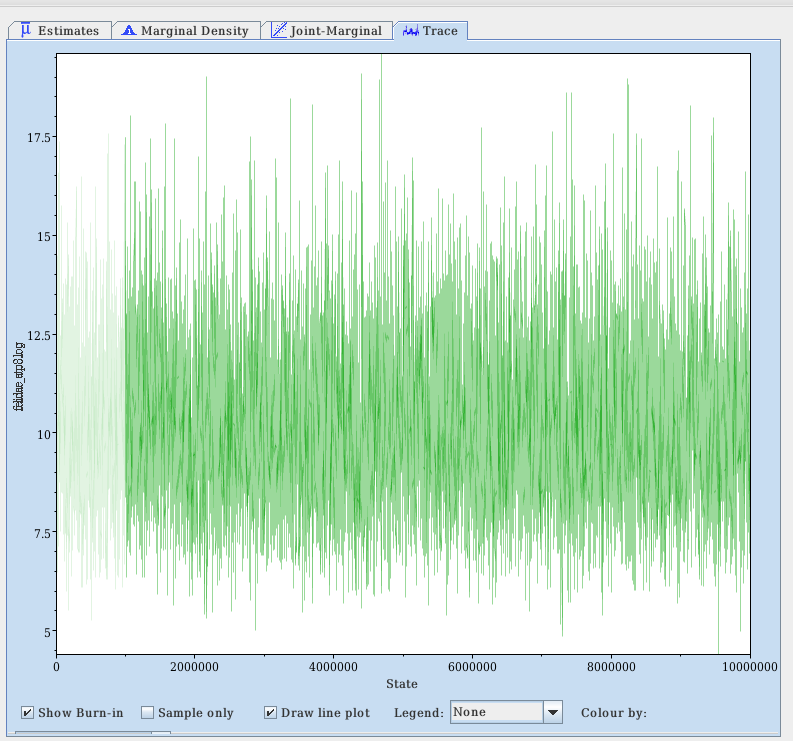

treeannotator...
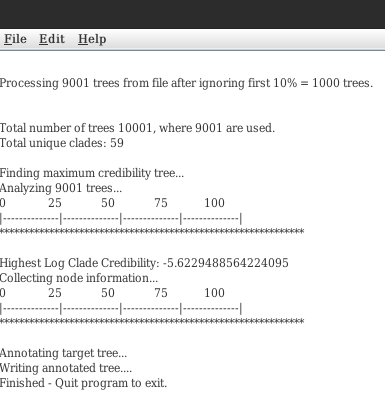

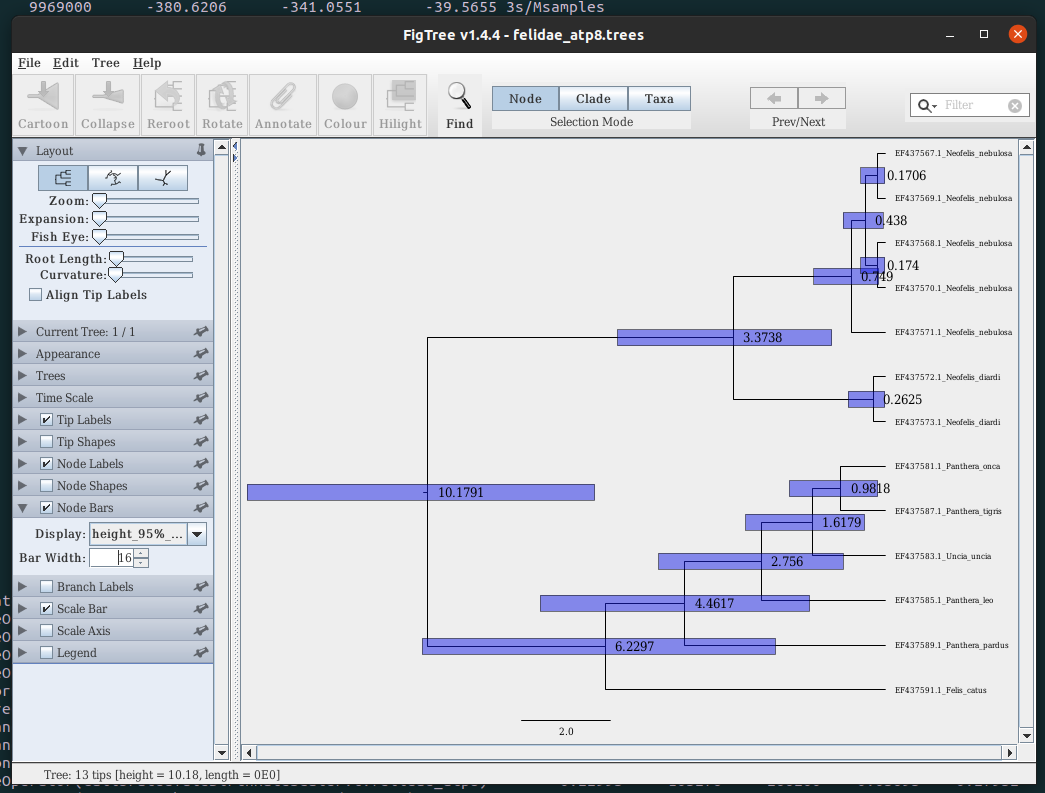

Данные, в целом, очень похожи, расхождение Neophelis отодвинулось назад во времени, но 95% интервал включает значение в 2 с небольшим млн лет на прошлом построении.